In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")

# Extract works

In [3]:
works_cnt = pd.Series()
for works in texts_df["works"]:
    for work in works:
        if work not in works_cnt:
            works_cnt[work] = 1
        else:
            works_cnt[work] += 1
print('Number of unique works: ' + str(len(works_cnt)))
print('Number of works occurring more than once: ' + str(len(works_cnt[works_cnt>1])))
print('Number of works occurring more than 5 times: ' + str(len(works_cnt[works_cnt>5])))

Number of unique works: 1465
Number of works occurring more than once: 282
Number of works occurring more than 5 times: 38


In [4]:
works_cnt.sort_index().to_csv('worksnames.csv')

In [5]:
texts_df.loc[texts_df.journal_title=='Le Spectateur français ou le Nouveau Socrate moderen','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_df.loc[texts_df.journal_title=='Le Spectateur françois ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_df.loc[texts_df.journal_title=='Le Spectateur français ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_df.loc[texts_df.journal_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_df.loc[texts_df.journal_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'
texts_df.loc[texts_df.journal_title=='Le Spectateur français ou Journal des Mœurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_df.loc[texts_df.journal_title=='Le Spectateur français, ou Journal des moeurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_df = texts_df.drop(texts_df[texts_df.journal_title=='missing'].index)
texts_df.journal_title.unique()

array(['Le Censeur ou Caractères des Mœurs de la Haye', 'Le Monde',
       'Le Misantrope', 'El Catón Compostelano', 'Il Filosofo alla Moda',
       'Le Monde comme il est (Bastide)', 'El Argonauta Español',
       'El Duende Crítico', 'Lo Spettatore italiano',
       'Le Spectateur français avant la révolution', 'La Bigarure',
       'Le Spectateur françois pendant le gouvernement révolutionnaire',
       'Leipziger Spectateur',
       'La Frusta letteraria di Aristarco Scannabue',
       'O Anonymo. Repartido pelas semanas, para divertimento e utilidade do publico',
       'Le Spectateur ou le Socrate moderne', 'El Pensador',
       'Le Cabinet du Philosophe', 'Il Caffè',
       "La Spectatrice. Ouvrage traduit de l'anglois",
       'L’Osservatore veneto', 'Le Nouveau Spectateur français',
       'Le Mentor moderne', 'La Bagatelle', 'Gazzetta urbana veneta',
       'El Censor', 'La Pensadora Gaditana',
       'Le Nouveau Spectateur (Bastide)', 'Gli Osservatori veneti',
       'El Mur

In [6]:
import csv
with open('journal_dictionary.csv', mode='r') as infile:
    reader = csv.reader(infile)
    #mydict = {rows[0]:rows[1] for rows in reader if not rows[1]==''}
    mydict = {rows[0]:rows[1] for rows in reader}

In [7]:
new_works_cnt=works_cnt.rename(mydict)

In [8]:
new_works_cnt=new_works_cnt.groupby(new_works_cnt.index).sum()
print('Number of unique works: ' + str(len(new_works_cnt)))
print('Number of works occurring more than once: ' + str(len(new_works_cnt[new_works_cnt>1])))
print('Number of works occurring more than 5 times: ' + str(len(new_works_cnt[new_works_cnt>5])))

Number of unique works: 24
Number of works occurring more than once: 18
Number of works occurring more than 5 times: 12


In [60]:
works_df=texts_df
works_short=new_works_cnt
for work in works_short.index:
    works_df[work]=0
    if not work in mydict:
        mydict[work]=work
for row in range(len(works_df)):
    for work in works_df['works'].iloc[row]:
        if mydict.get(work) in set(works_short.index):
            works_df.loc[works_df.index[row],mydict.get(work)]=1
            
reduced_works_df=works_df.groupby('journal_title').sum()#[['journal_title','language'] + list(works_short.index)]
reduced_works_df=reduced_works_df.drop(labels='',axis=1)
reduced_works_df.head()

,El Catón Compostelano,El Curioso Entretenido,El Filosofo à la Moda,El Pensador,El Regañón general,Il Caffè,La Bagatelle,La Gazzetta Veneta,La Pensadora Gaditana,La Spectatrice,...,Le Misantrope,Le Monde,Le Monde comme il est (Bastide),Le Nouveau Spectateur (Bastide),Le Nouveau Spectateur français,Le Philosophe nouvelliste,Le Spectateur ou le Socrate moderne,Les Chiffons,Spettatore piemontese,The Spectator
journal_title,,,,,,,,,,,,,,,,,,,,,
Der Bürger,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Der Zuschauer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Die Zuschauerin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Donna galante,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
El Amigo y Corresponsal del Censor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
reduced_works_df.columns = [x.encode('utf-8').decode('latin-1') for x in reduced_works_df.columns]
reduced_works_df.index = [x.encode('utf-8').decode('latin-1') for x in reduced_works_df.index]
reduced_works_df.columns[0]

'El CatÃ³n Compostelano'

In [52]:
import networkx as nx
import numpy as np

In [61]:
for journal in set(list(reduced_works_df.columns)+list(reduced_works_df.index)):
    if journal not in reduced_works_df.columns:
        reduced_works_df[journal]=0
    if journal not in reduced_works_df.index:
        reduced_works_df.loc[journal]=0

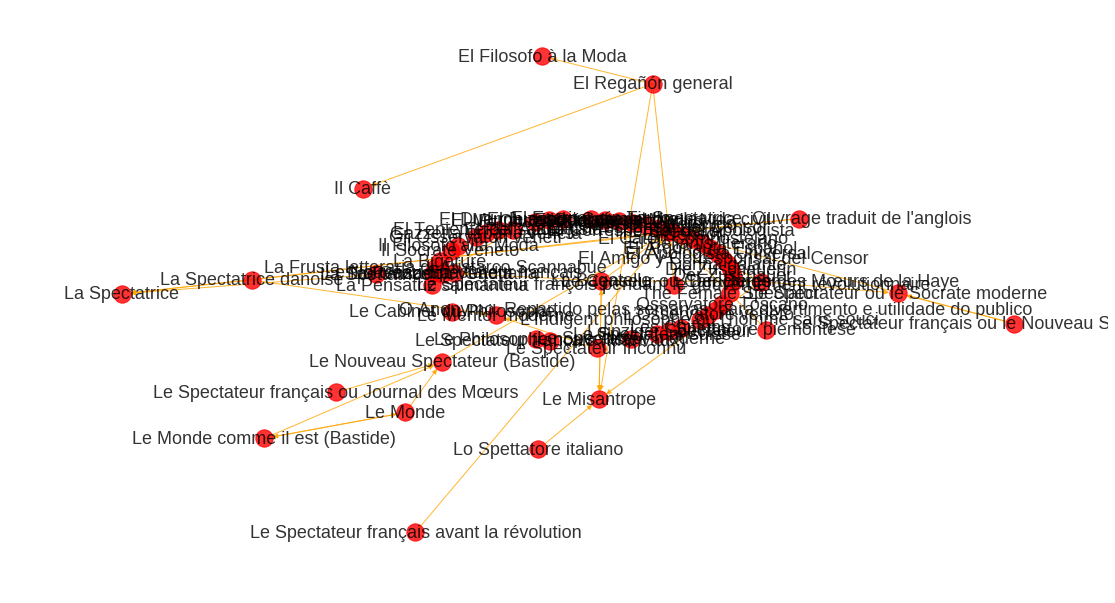

In [62]:
G = nx.from_pandas_adjacency(reduced_works_df,create_using=nx.DiGraph())
plt.figure(figsize=(15,8))
nx.draw_kamada_kawai(G,with_labels=True,font_size=18,font_color='k',edge_color='orange',alpha=0.8)
plt.show()

In [63]:
G.remove_nodes_from(list(nx.isolates(G)))

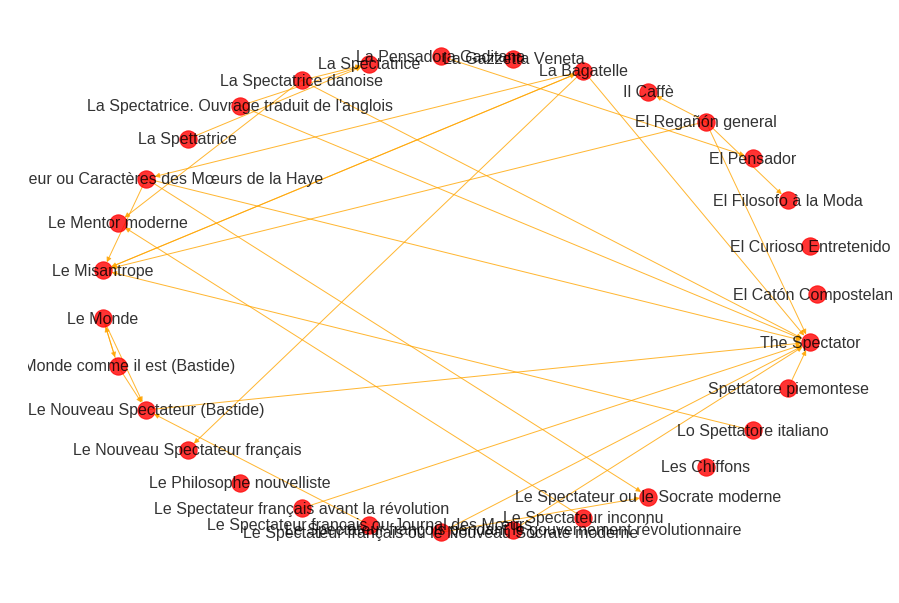

In [64]:
plt.figure(figsize=(12,8))
nx.draw_shell(G,with_labels=True,font_size=16,font_color='k',edge_color='orange',alpha=0.8)
plt.show()

In [57]:
A = nx.nx_agraph.to_agraph(G)

In [58]:
from pygraphviz import *
A.draw('journal2journal.eps',prog='fdp')

In [65]:
nx.write_gexf(G, "test.gexf")